#Porfilio Trujillo Martinez

###Taller 6

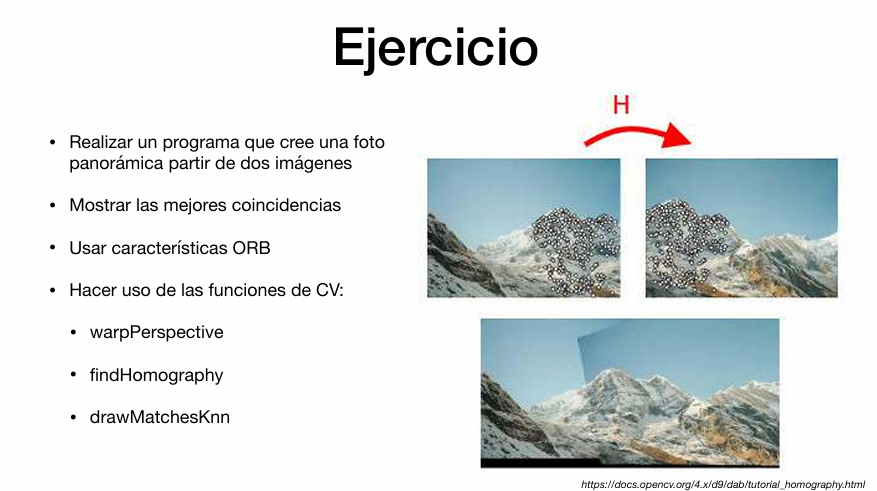

Importar librerias

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Cargar y ver imagenes

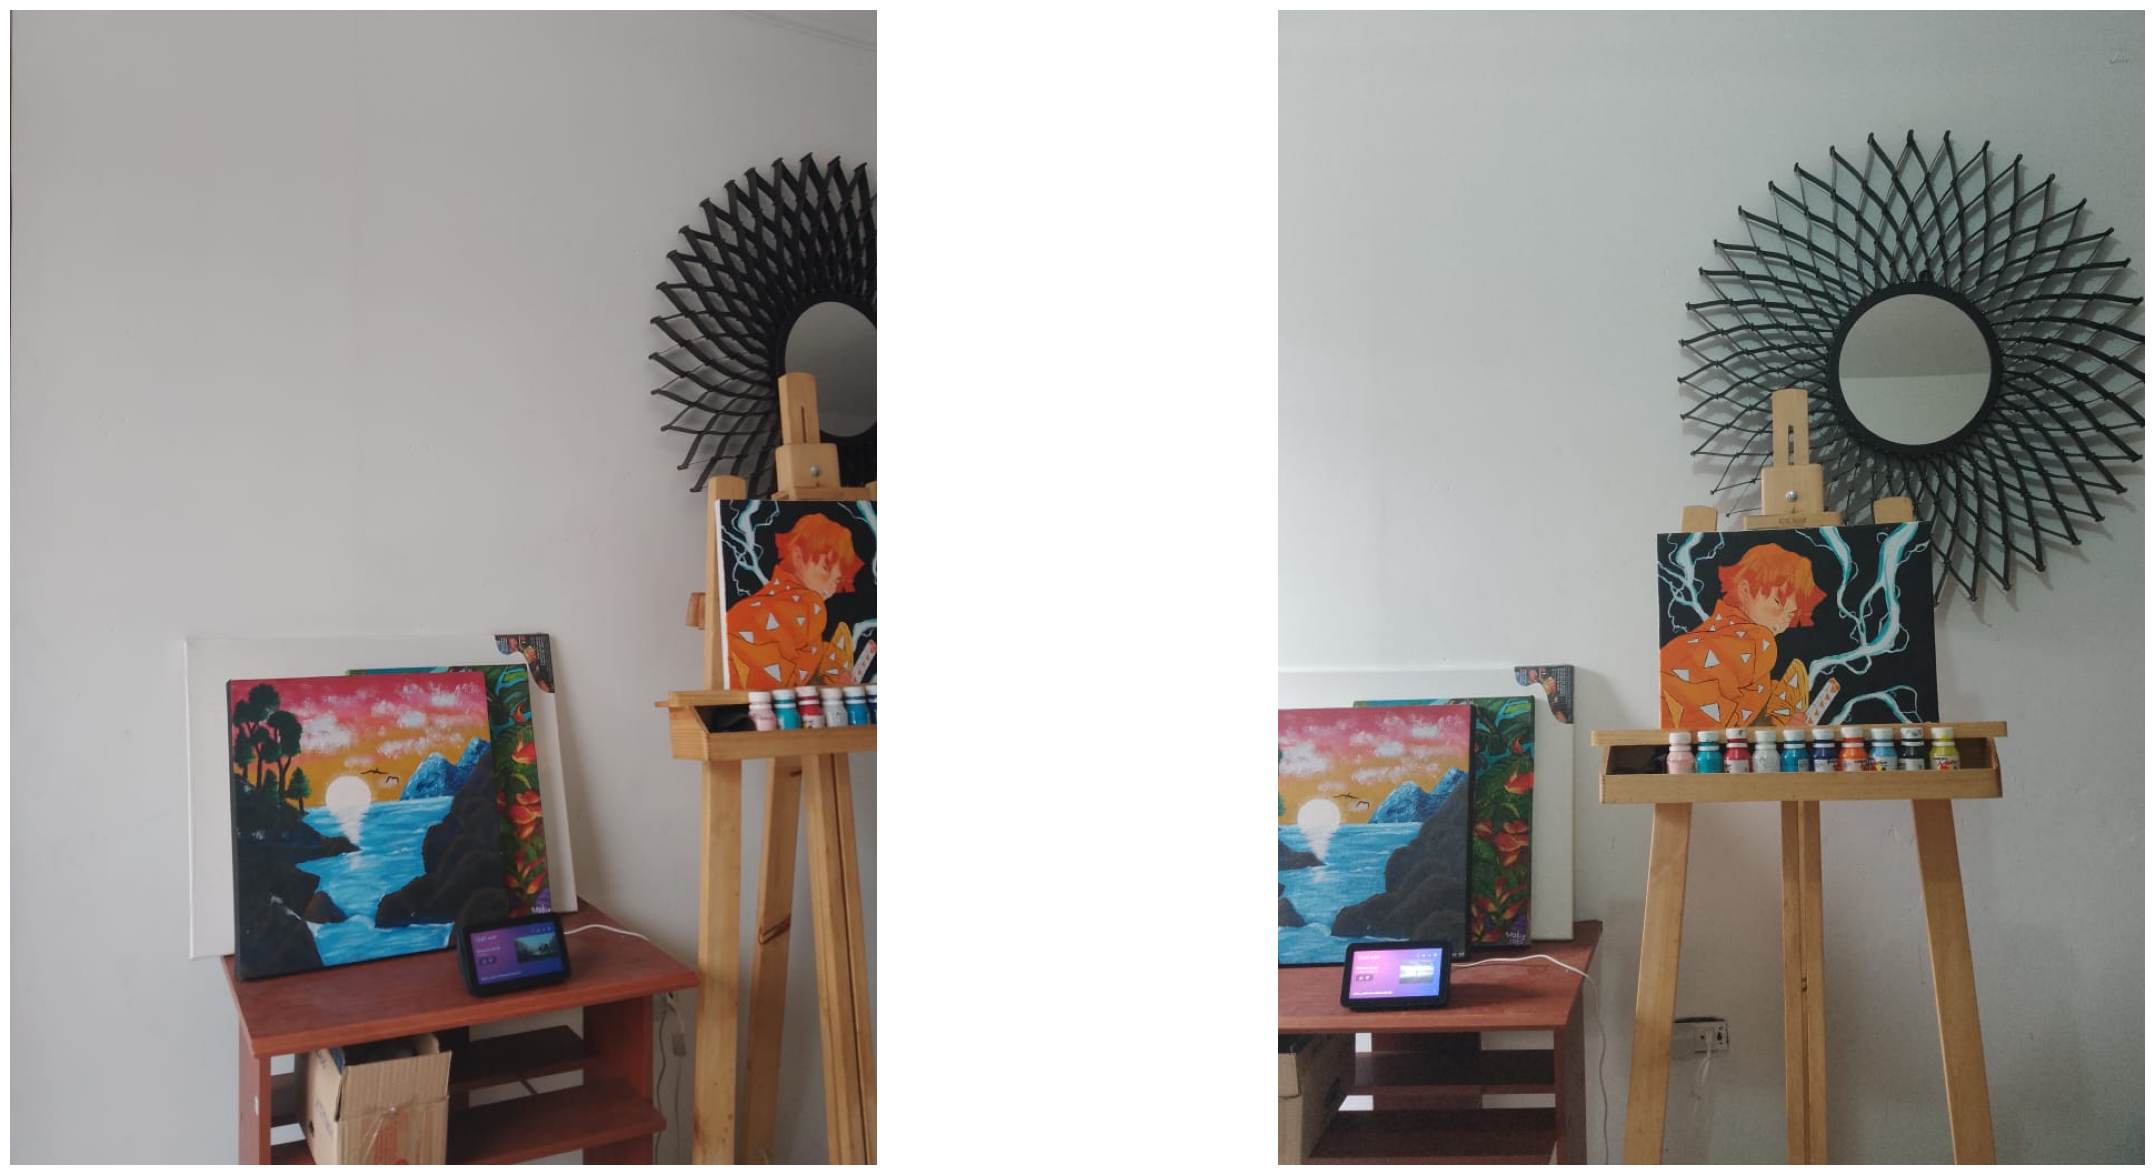

In [55]:
im1 = '/content/drive/MyDrive/Clase Visión Computo/Slides/6-slides/im1.jpeg'
im2 = '/content/drive/MyDrive/Clase Visión Computo/Slides/6-slides/im2.jpeg'


img1 = cv2.imread(im1)
img2 = cv2.imread(im2)
imagen1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
imagen2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30, 15))

plt.subplot(1, 2, 1)
plt.imshow(imagen1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen2)
plt.axis('off')


plt.show()



###Programa que cree una foto panorámica partir de dos imágenes

In [63]:
img1 = cv2.imread('/content/drive/MyDrive/Clase Visión Computo/Slides/6-slides/im1.jpeg')
img2 = cv2.imread('/content/drive/MyDrive/Clase Visión Computo/Slides/6-slides/im2.jpeg')

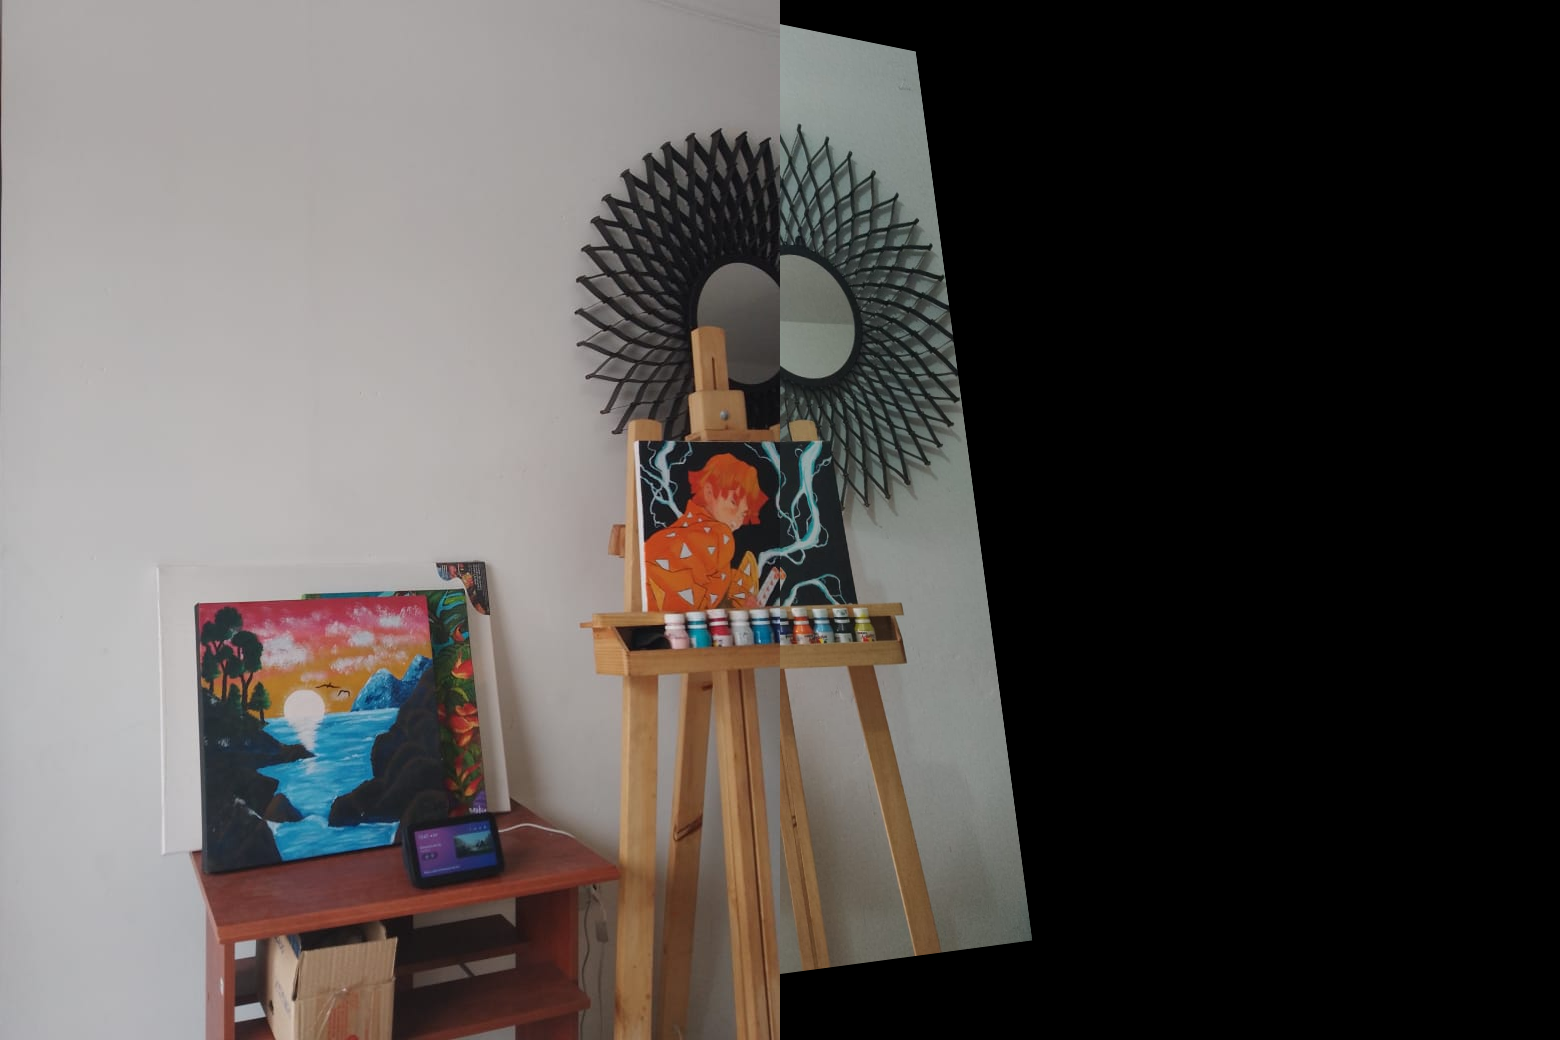

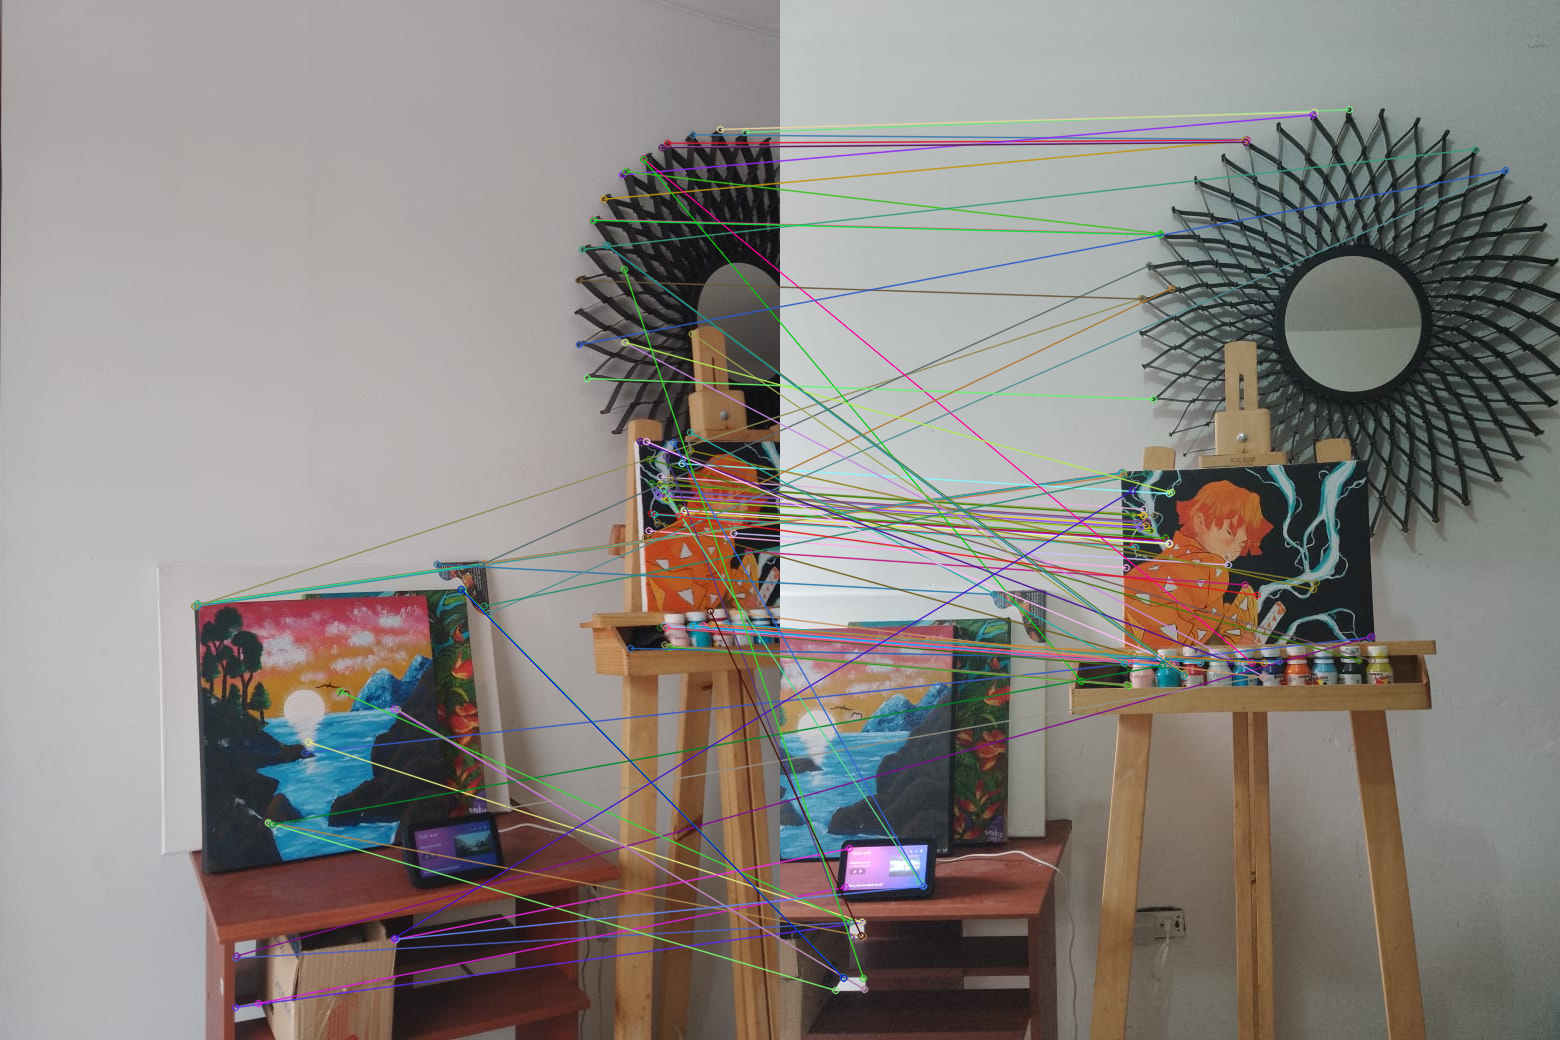

In [64]:
def create_panorama(img1, img2):
    # Inicializar el detector ORB
    orb = cv2.ORB_create()

    # Encontrar los puntos clave y sus descriptores para ambas imágenes
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Inicializar el objeto de coincidencia de fuerza bruta
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Realizar la coincidencia de los descriptores
    matches = bf.match(descriptors1, descriptors2)

    # Ordenar las coincidencias por distancia
    matches = sorted(matches, key=lambda x: x.distance)

    # Elegir solo las mejores coincidencias
    good_matches = matches[:100]  # Puedes ajustar este número según tus necesidades

    # Dibujar los emparejamientos en una nueva imagen
    matching_result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Convertir los puntos clave en formato numpy array
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Calcular la matriz de homografía
    H, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Deformar la segunda imagen para alinearla con la primera
    img2_aligned = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))

    # Superponer las imágenes
    img2_aligned[0:img1.shape[0], 0:img1.shape[1]] = img1

    return img2_aligned, matching_result

# Cargar las imágenes
#img1 = cv2.imread('/content/drive/MyDrive/Clase Visión Computo/Slides/6-slides/im1.jpeg')
#img2 = cv2.imread('/content/drive/MyDrive/Clase Visión Computo/Slides/6-slides/im2.jpeg')

# Crear la foto panorámica y obtener los emparejamientos dibujados
panorama, matching_result = create_panorama(img1, img2)

# Mostrar la foto panorámica y los emparejamientos
cv2_imshow(panorama)
cv2_imshow(matching_result)